

#Proyecto easyMoney

##1. Resumen del proyecto

Carol está buscando análisis y datos que puedan ayudar a la compañía easyMoney a tomar decisiones estratégicas en relación a su estrategia comercial y la rentabilidad de su base actual de clientes. A continuación, se detallan los tipos de datos y decisiones que Carol menciona en su correo:

- Análisis de penetración de la cartera de productos: Carol quiere tener
información sobre la penetración de los productos de easyMoney en el mercado. Esto implica conocer cuántos productos se han vendido en un período determinado y si los clientes que los adquieren son nuevos o ya existentes. Con estos datos, se puede evaluar el nivel de adopción de los productos y tomar decisiones sobre cómo aumentar la penetración entre los clientes actuales.

- Análisis de rentabilidad de la base de clientes: Carol menciona que la empresa necesita obtener una mejor rentabilidad de su base actual de clientes. Para ello, es necesario analizar los datos relacionados con los ingresos generados por los clientes, los costos asociados a su adquisición y retención, y
cualquier otra métrica relevante para evaluar la rentabilidad. Estos análisis permitirán identificar oportunidades para mejorar la rentabilidad de los clientes existentes y tomar decisiones sobre estrategias de fidelización y upselling.

- KPIs y métricas clave: Carol sugiere utilizar la herramienta PowerBI para preparar indicadores clave de rendimiento (KPIs) que proporcionen una visión clara de la situación de la empresa. Quiere tener información actualizada sobre el desempeño de la compañía en áreas como ventas, adquisición de clientes, retención, ingresos, gastos, entre otros. Estos KPIs ayudarán a medir el progreso y permitirán tomar decisiones basadas en datos durante las reuniones del Comité de Dirección.

En resumen, Carol busca análisis que brinden información sobre la penetración de productos, la rentabilidad de los clientes y la creación de KPIs para monitorear el desempeño de la compañía. Estos análisis respaldarán la toma de decisiones estratégicas en easyMoney.

##2. Importación de las bibliotecas requeridas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from google.colab import files


##3. Carga de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

products = pd.read_csv('/content/drive/MyDrive/customer_products.csv')
sociodemographics = pd.read_csv('/content/drive/MyDrive/customer_sociodemographics.csv')
commercial = pd.read_csv('/content/drive/MyDrive/customer_commercial_activity.csv')
sales = pd.read_csv('/content/drive/MyDrive/sales.csv')
product_desc = pd.read_csv('/content/drive/MyDrive/product_description.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##4. Revision de las tablas

###Sales

 *Consideramos que es más adecuado comenzar por el análisis del archivo de ventas, ya que nos permitirá obtener información relevante sobre la cantidad de productos vendidos por la empresa easyMoney y determinar qué tipos de productos han generado mayores beneficios en el pasado. A medida que avanzamos, iremos agregando la información necesaria sobre los clientes y los productos.*

In [ ]:
sales.head()

,Unnamed: 0,pk_sale,cid,month_sale,product_ID,net_margin
0,0,6666,33620,2018-05-01,2335,952.9
1,1,6667,35063,2018-06-01,2335,1625.2
2,2,6668,37299,2018-02-01,2335,1279.7
3,3,6669,39997,2018-02-01,2335,1511.9
4,4,6670,44012,2018-02-01,2335,1680.3


In [ ]:
sales.isnull().sum()

Unnamed: 0    0
pk_sale       0
cid           0
month_sale    0
product_ID    0
net_margin    0
dtype: int64

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  240773 non-null  int64  
 1   pk_sale     240773 non-null  int64  
 2   cid         240773 non-null  int64  
 3   month_sale  240773 non-null  object 
 4   product_ID  240773 non-null  int64  
 5   net_margin  240773 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.0+ MB


In [ ]:
sales['month_sale'] = pd.to_datetime(sales['month_sale'], format='%Y-%m')

In [ ]:
sales.shape

(240773, 6)


 *Removemos la columna innecesaria "Unnamed" y verificamos si esta columna también está presente en otros conjuntos de datos.*

In [ ]:
def remove_unnamed_column(dataset):
    if 'Unnamed: 0' in dataset.columns:
        dataset.drop('Unnamed: 0', axis=1, inplace=True)

remove_unnamed_column(products)
remove_unnamed_column(sociodemographics)
remove_unnamed_column(commercial)
remove_unnamed_column(sales)
remove_unnamed_column(product_desc)

###Product description

*Observando la estructura actual de la tabla "sales", notamos que solo contiene el identificador del producto. Sin embargo, para obtener una mejor comprensión de los datos y enriquecer nuestro análisis, deseamos incluir el **nombre del producto y la categoría de la familia a la que pertenece**. Para lograr esto, procederemos a realizar una combinación de datos utilizando una tabla adicional llamada "products", que contiene la información detallada de cada producto, incluyendo su nombre y categoría de familia.*

*Agregamos la descripción del producto a la tabla de ventas (sales) para que sea más claro qué tipo de producto corresponde a cada ID.*

In [ ]:
product_desc.head()

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


In [ ]:
def merge_sales_product_desc(sales, product_desc):
    sales['product_description'] = sales['product_ID'].map(product_desc.set_index('pk_product_ID')['product_desc'])
    sales['family_product'] = sales['product_ID'].map(product_desc.set_index('pk_product_ID')['family_product'])
    return sales

sales = merge_sales_product_desc(sales, product_desc)


*Una vez finalizado el proceso de limpieza de la tabla sales, donde se han observado los valores nulos y las columnas innecesarias, procederemos a enriquecer la información sobre nuestros clientes mediante la exploración de las tablas commercial y sociodemographics. Analizaremos las columnas disponibles en ambas tablas para determinar qué información adicional podemos incorporar a la tabla sales y así obtener un panorama más detallado de nuestros clientes. Esta información nos permitirá realizar análisis más profundos y personalizados para comprender mejor las características y comportamientos de nuestros clientes.*

### Commercial activity

In [ ]:
commercial.shape

(5962924, 6)

In [ ]:
commercial.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


*Añadimos la columna de fecha de entrada a la tabla de ventas (sales) para comprender si el cliente es nuevo o no. Para garantizar la exactitud de esta información, realizamos un merge con la tabla commercial en función del ID del cliente (pk_cid) y seleccionamos la fecha de entrada más antigua como la verdadera fecha de primera contratación a través de easyMoney.*

In [ ]:
def copy_entry_date(sales, commercial):

    commercial_copy = commercial.copy()

    commercial_copy['entry_date'] = pd.to_datetime(commercial_copy['entry_date'], format='%Y-%m')
    sales['month_sale'] = pd.to_datetime(sales['month_sale'], format='%Y-%m')
    commercial_copy.sort_values('entry_date', ascending=False, inplace=True)
    commercial_copy.drop_duplicates(subset='pk_cid', keep='first', inplace=True)
    sales = pd.merge(sales, commercial_copy[['pk_cid', 'entry_date']], how='left', left_on='cid', right_on='pk_cid')
    sales = sales[sales['entry_date'].isnull() | (sales['entry_date'] <= sales['month_sale'])]

    return sales

sales = copy_entry_date(sales, commercial)

In [ ]:
is_entry_earlier = sales['entry_date'] <= sales['month_sale']
print(is_entry_earlier.all())

True


In [ ]:
same_values = (sales['pk_cid'] == sales['cid']).all()

print("Los valores en 'pk_cid' y 'cid' columnas son los mismos:", same_values)

if same_values:
    sales.drop('cid', axis=1, inplace=True)

Los valores en 'pk_cid' y 'cid' columnas son los mismos: True




 *Vamos a considerar que los clientes **nuevos** son aquellos que han realizado una compra el mismo mes en el que entraron por primera vez en easyMoney. Por otro lado, los clientes **antiguos** serán aquellos que realizaron su primera compra en un mes anterior al de su entrada o antes. Para añadir esta información, crearemos una nueva columna en la tabla de ventas (sales) que categorice si el cliente es nuevo o no. Realizaremos una comparación entre las columnas "entry_date" y "month_sale" para determinar si coinciden en el mes y año. Si es así, el cliente será etiquetado como nuevo; de lo contrario, se considerará un cliente antiguo.*

In [ ]:
def categorize_clients(sales):
    sales['entry_date'] = pd.to_datetime(sales['entry_date'], format='%Y-%m')
    sales['month_sale'] = pd.to_datetime(sales['month_sale'], format='%Y-%m')
    sales['client_category'] = sales.apply(lambda row: 'New' if row['month_sale'] == row['entry_date'] else 'Old', axis=1)
    return sales

sales = categorize_clients(sales)


 *En la siguiente sección, procederemos a combinar **las columnas que contienen la información del cliente** de la tablas "commercial". Primero, realizaremos una copia de la tabla, seleccionando únicamente las columnas relevantes que necesitamos. Luego, llevaremos a cabo la fusión de estas tablas utilizando la función de merge.*

In [ ]:
commercial_copy = commercial[['pk_partition', 'pk_cid', 'entry_channel', 'active_customer', 'segment']].copy()
commercial_copy['pk_partition'] = pd.to_datetime(commercial_copy['pk_partition'], format='%Y-%m')
merged_sales = sales.merge(commercial_copy, left_on=['month_sale', 'pk_cid'], right_on=['pk_partition', 'pk_cid'], how='left')

*Una información útil que podemos analizar en este dataset es la cantidad de **clientes activos en cada partición**. Esto nos permitirá tener una visión clara de la evolución de la base de clientes a lo largo del tiempo.*

In [ ]:
commercial['pk_partition'] = pd.to_datetime(commercial['pk_partition'])
active_customers_por_partition = commercial.groupby('pk_partition')['active_customer'].sum()
active_customers_por_partition

pk_partition
2018-01-01    108211.0
2018-02-01    111085.0
2018-03-01    113806.0
2018-04-01    116318.0
2018-05-01    119066.0
2018-06-01    121560.0
2018-07-01    129287.0
2018-08-01    136350.0
2018-09-01    144787.0
2018-10-01    151962.0
2018-11-01    156321.0
2018-12-01    159235.0
2019-01-01    162545.0
2019-02-01    165067.0
2019-03-01    168185.0
2019-04-01    169998.0
2019-05-01    171568.0
Name: active_customer, dtype: float64

###Sociodemographics

*Ahora procederemos a explorar la base de datos sociodemographics con **el objetivo de comprender mejor el perfil de nuestros clientes**, tanto los nuevos como los antiguos. Analizaremos variables **demográficas** y **socioeconómicas** para obtener una visión más completa de quiénes son nuestros clientes y qué características los definen. Esto nos ayudará a comprender mejor a quién nos dirigimos y a personalizar nuestras estrategias de marketing y ventas.*

In [ ]:
sociodemographics.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [ ]:
sociodemographics.isnull().sum()

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1541104
dtype: int64

 *Después de revisar las tablas sociodemographics y commercial, hemos identificado la presencia de valores nulos en ambas tablas. Sin embargo, hemos tomado la decisión de **no eliminar ni imputar estos valores nulos para el proceso de análisis y visualización de datos**. Esta elección se debe a que deseamos visualizar los datos de manera precisa y reflejar la realidad de la información recopilada.*

 *Es importante tener en cuenta que, en futuros procesos de machine learning, es posible que abordemos los valores nulos de manera diferente, como aplicar técnicas de imputación para asegurar la integridad de los datos durante el entrenamiento de los modelos. No obstante, **en la etapa actual de análisis y visualización, nos enfocaremos en trabajar con los datos existentes y mostrarlos de manera precisa y completa**.*

*Procederemos a realizar un merge de las columnas de sociodemographics que contienen información de cliente a la tabla "sales".*

In [ ]:
sociodemographics_copy = sociodemographics.copy().drop_duplicates(subset='pk_cid')
merged_sales = merged_sales.merge(sociodemographics_copy[['pk_cid', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']], on='pk_cid', how='left')

In [ ]:
merged_sales.head()

,pk_sale,month_sale,product_ID,net_margin,product_description,family_product,pk_cid,entry_date,client_category,pk_partition,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,6666,2018-05-01,2335,952.9,short_term_deposit,investment,33620,2018-04-01,Old,2018-05-01,KHK,1.0,02 - PARTICULARES,ES,28.0,H,50,N,138618.57
1,6667,2018-06-01,2335,1625.2,short_term_deposit,investment,35063,2018-04-01,Old,2018-06-01,KHN,1.0,01 - TOP,ES,28.0,H,62,N,125530.41
2,6668,2018-02-01,2335,1279.7,short_term_deposit,investment,37299,2018-01-01,Old,2018-02-01,KHK,1.0,01 - TOP,ES,30.0,V,54,N,NaN
3,6669,2018-02-01,2335,1511.9,short_term_deposit,investment,39997,2018-01-01,Old,2018-02-01,KAT,1.0,02 - PARTICULARES,ES,41.0,V,62,N,201575.01
4,6670,2018-02-01,2335,1680.3,short_term_deposit,investment,44012,2018-01-01,Old,2018-02-01,KHL,1.0,02 - PARTICULARES,ES,28.0,V,42,N,97601.04


*La nueva tabla **"merged_sales"** que hemos creado **se convertirá en nuestra tabla principal para realizar el análisis y la visualización de los indicadores clave de rendimiento (KPI) más importantes**. Esta tabla combina la información relevante de las tablas "sales", "commercial" y "sociodemographics", lo que nos permitirá obtener una visión integral de los clientes y sus transacciones. Utilizaremos esta tabla para extraer insights significativos y tomar decisiones informadas basadas en los KPI identificados.*

###Products

In [ ]:
products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1



*Para mejorar la legibilidad, utilizaremos la función "melt" para colocar el nombre del producto en la fila correspondiente al cliente.*

In [ ]:
columnas = products.columns[2:]
products_melted = pd.melt(products,id_vars=["pk_cid","pk_partition"],value_vars=columnas,var_name="Producto",value_name='Valor')
products_melted

,pk_cid,pk_partition,Producto,Valor
0,1375586,2018-01,short_term_deposit,0.0
1,1050611,2018-01,short_term_deposit,0.0
2,1050612,2018-01,short_term_deposit,0.0
3,1050613,2018-01,short_term_deposit,1.0
4,1050614,2018-01,short_term_deposit,0.0
...,...,...,...,...
89443855,1166765,2019-05,em_acount,1.0
89443856,1166764,2019-05,em_acount,1.0
89443857,1166763,2019-05,em_acount,1.0
89443858,1166789,2019-05,em_acount,1.0


In [ ]:
products_melted['Valor'].unique()

array([ 0.,  1., nan])

In [ ]:
products_melted_clean = products_melted[products_melted['Valor'] == 1.0]
products_melted_clean.set_index('pk_cid', inplace=True)
products_melted_clean

,pk_partition,Producto,Valor
pk_cid,,,
1050613,2018-01,short_term_deposit,1.0
1056434,2018-01,short_term_deposit,1.0
1044472,2018-01,short_term_deposit,1.0
1059787,2018-01,short_term_deposit,1.0
1013549,2018-01,short_term_deposit,1.0
...,...,...,...
1166765,2019-05,em_acount,1.0
1166764,2019-05,em_acount,1.0
1166763,2019-05,em_acount,1.0



*Agregaremos las columnas relevantes de otras tablas para visualizar la información del cliente, de manera similar a como lo hicimos en la tabla de ventas.*

In [ ]:
products_melted_clean['pk_partition'] = pd.to_datetime(products_melted_clean['pk_partition'])
commercial['pk_partition'] = pd.to_datetime(commercial['pk_partition'])
sociodemographics['pk_partition'] = pd.to_datetime(commercial['pk_partition'])
merged_products = products_melted_clean.merge(commercial[['pk_cid', 'pk_partition', 'entry_channel', 'active_customer', 'segment']], on=['pk_cid', 'pk_partition'])
merged_products = merged_products.merge(sociodemographics[['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary']], on=['pk_cid', 'pk_partition'])
merged_products

<ipython-input-27-7ed8162d3f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_melted_clean['pk_partition'] = pd.to_datetime(products_melted_clean['pk_partition'])


,pk_cid,pk_partition,Producto,Valor,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
0,1050613,2018-01-01,short_term_deposit,1.0,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,119775.54
1,1056434,2018-01-01,short_term_deposit,1.0,KHE,1.0,02 - PARTICULARES,ES,15.0,V,41,N,NaN
2,1056434,2018-01-01,em_acount,1.0,KHE,1.0,02 - PARTICULARES,ES,15.0,V,41,N,NaN
3,1044472,2018-01-01,short_term_deposit,1.0,KHM,1.0,02 - PARTICULARES,ES,8.0,V,32,N,105936.51
4,1059787,2018-01-01,short_term_deposit,1.0,KHK,0.0,02 - PARTICULARES,ES,46.0,V,41,N,68762.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254513,1166765,2019-05-01,em_acount,1.0,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,V,22,N,43912.17
6254514,1166764,2019-05-01,em_acount,1.0,KHE,0.0,03 - UNIVERSITARIO,ES,26.0,V,23,N,23334.99
6254515,1166763,2019-05-01,em_acount,1.0,KHE,1.0,02 - PARTICULARES,ES,50.0,H,47,N,NaN
6254516,1166789,2019-05-01,em_acount,1.0,KHE,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,N,199592.82


*Ahora procederemos a realizar un análisis de retención de clientes mediante la tabla "products" para comprender qué tipo de clientes perdemos y por qué. Para ello, calcularemos la duración de la tenencia de los clientes por producto, expresada en meses. Esta métrica nos permitirá obtener información valiosa sobre la lealtad y la persistencia de los clientes en relación con los diferentes productos que ofrecemos.*

In [ ]:
products['pk_partition'] = pd.to_datetime(products['pk_partition'])

melted_products = products.melt(id_vars=['pk_cid', 'pk_partition'], var_name='producto', value_name='tenencia')
melted_products = melted_products[melted_products['tenencia'] == 1]
melted_products['duracion_tenencia'] = (pd.to_datetime('2019-05-31') - melted_products['pk_partition']).dt.days // 30 #meses
tenencia_por_producto = melted_products.groupby(['producto', 'duracion_tenencia']).size().reset_index(name='cantidad_clientes')

tenencia_por_producto

##Analisis adicional

*Ahora deseamos crear gráficos para tener una mejor comprensión de la información que tenemos, como la distribución de los productos en las ventas y el tipo de clientes que tenemos. Estos gráficos nos ayudarán a obtener una idea más clara de los conjuntos de datos y posteriormente realizar visualizaciones más precisas en Power BI.*

###Número de Ventas por Categoría de Cliente - Mensual

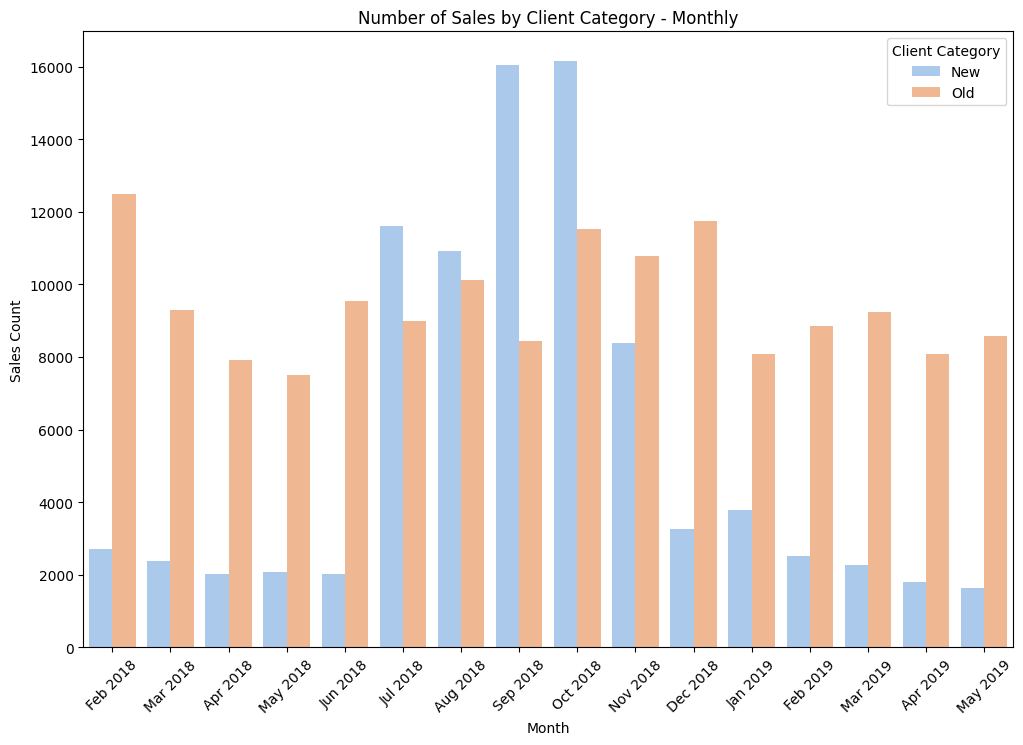

In [ ]:
monthly_sales = sales.groupby(['month_sale', 'client_category'])['pk_sale'].nunique().reset_index()

monthly_sales['month_sale'] = pd.to_datetime(monthly_sales['month_sale'])
monthly_sales['month_sale'] = monthly_sales['month_sale'].dt.strftime('%b %Y')

plt.figure(figsize=(12, 8))
sns.barplot(data=monthly_sales, x='month_sale', y='pk_sale', hue='client_category', palette='pastel')
plt.title('Number of Sales by Client Category - Monthly')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.legend(title='Client Category')
plt.show()


 *Para visualizar la cantidad de productos vendidos por tipo de cliente, podemos utilizar un gráfico de mapa de calor (heatmap). Utilizando la función adecuada de visualización, como por ejemplo seaborn.heatmap(), podemos crear el gráfico de mapa de calor. En el eje x del gráfico colocaremos el tipo de cliente (nuevo o antiguo), en el eje y colocaremos el tipo de producto, y el color de cada celda del mapa representará la cantidad de productos vendidos. De esta manera, podremos visualizar de manera clara y efectiva la cantidad de productos vendidos de la empresa por tipo de cliente, y detectar cualquier patrón o tendencia en la distribución de las ventas.*

###Número de ventas por categoría de cliente y tipo de producto: todo el período

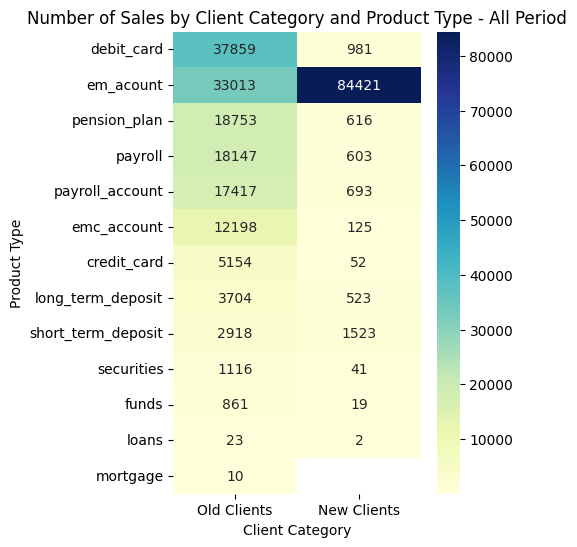

In [ ]:
old_clients = sales[sales['client_category'] == 'Old']
new_clients = sales[sales['client_category'] == 'New']

old_clients_product_counts = old_clients['product_description'].value_counts()
new_clients_product_counts = new_clients['product_description'].value_counts()

sales_counts_by_product = pd.concat([old_clients_product_counts, new_clients_product_counts], axis=1)
sales_counts_by_product.columns = ['Old Clients', 'New Clients']

plt.figure(figsize=(4, 6))
sns.heatmap(sales_counts_by_product, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Number of Sales by Client Category and Product Type - All Period')
plt.xlabel('Client Category')
plt.ylabel('Product Type')
plt.show()




*Aquí se presenta un grafico para visualizar la rentabilidad de los clientes nuevos y antiguos en lugar de la cantidad de productos vendidos.*

###Beneficio obtenido por clientes nuevos y antiguos

<ipython-input-46-90511b2fadf5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


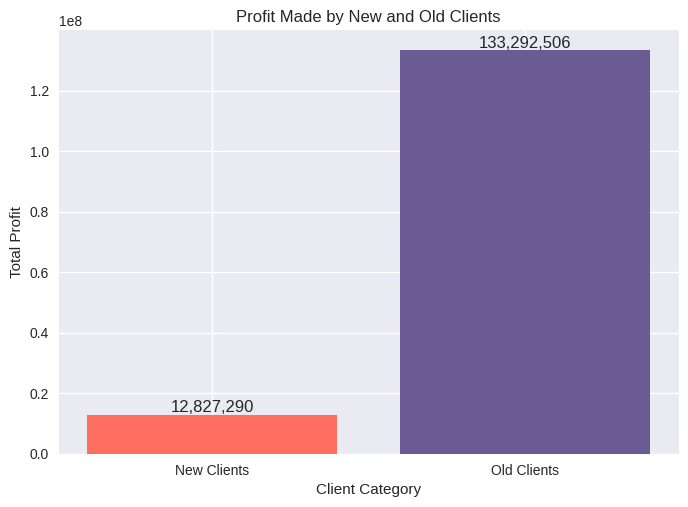

In [ ]:
new_clients_profit = sales[sales['client_category'] == 'New']['net_margin'].sum()
old_clients_profit = sales[sales['client_category'] == 'Old']['net_margin'].sum()

plt.style.use('seaborn')
plt.bar(['New Clients', 'Old Clients'], [new_clients_profit, old_clients_profit], color=['#FF6F61', '#6B5B95'])
plt.xlabel('Client Category')
plt.ylabel('Total Profit')
plt.title('Profit Made by New and Old Clients')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, profit in enumerate([new_clients_profit, old_clients_profit]):
    plt.text(i, profit, f'{profit:,.0f}', ha='center', va='bottom', fontsize=12)
plt.show()


###Utilidad de Ventas por Categoría de Cliente y Tipo de Producto

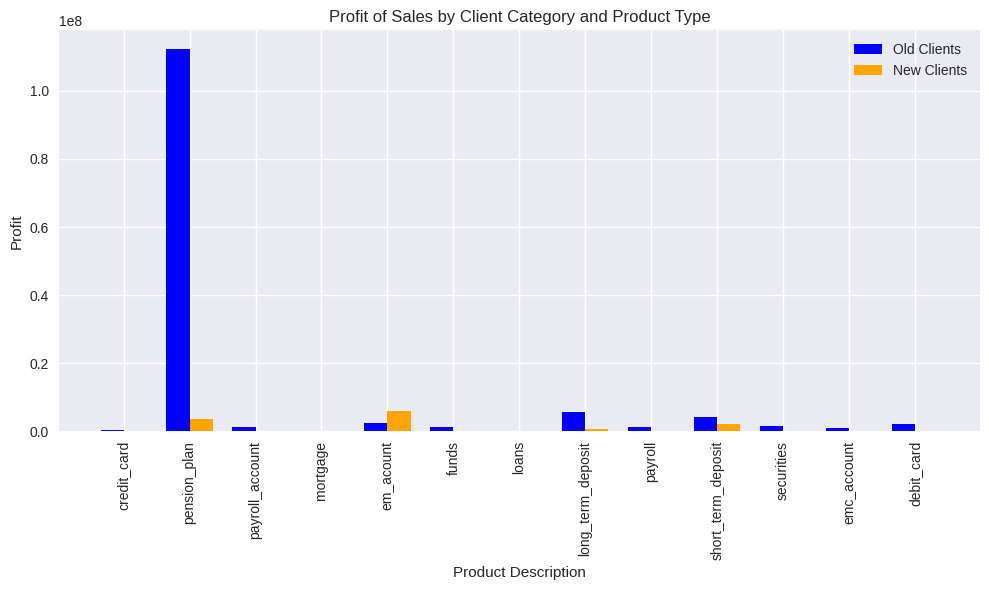

In [ ]:
old_clients_profit = old_clients.groupby('product_description')['net_margin'].sum()
new_clients_profit = new_clients.groupby('product_description')['net_margin'].sum()

old_clients_products = old_clients_profit.index.unique()
new_clients_products = new_clients_profit.index.unique()

unique_products = set(old_clients_products) | set(new_clients_products)

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(unique_products))
plt.bar(index, old_clients_profit.reindex(unique_products, fill_value=0), width=bar_width, color='blue', label='Old Clients')
plt.bar(index + bar_width, new_clients_profit.reindex(unique_products, fill_value=0), width=bar_width, color='orange', label='New Clients')

plt.xlabel('Product Description')
plt.ylabel('Profit')
plt.title('Profit of Sales by Client Category and Product Type')
plt.xticks(index + bar_width/2, unique_products, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

*En el gráfico anterior, la comparación de las ventas de productos no es claramente visible debido a que "pension plan" fue el producto más vendido, lo que dificulta la comparación con otros productos. Por lo tanto, en el siguiente gráfico, presentaremos todos los productos, excepto "pension plan", por separado para una mejor visualización y comparación.*

###Utilidad de Ventas por Categoría de Cliente y Tipo de Producto (Excluyendo "pension_plan")

<ipython-input-32-41755ead6e31>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('YlGnBu')


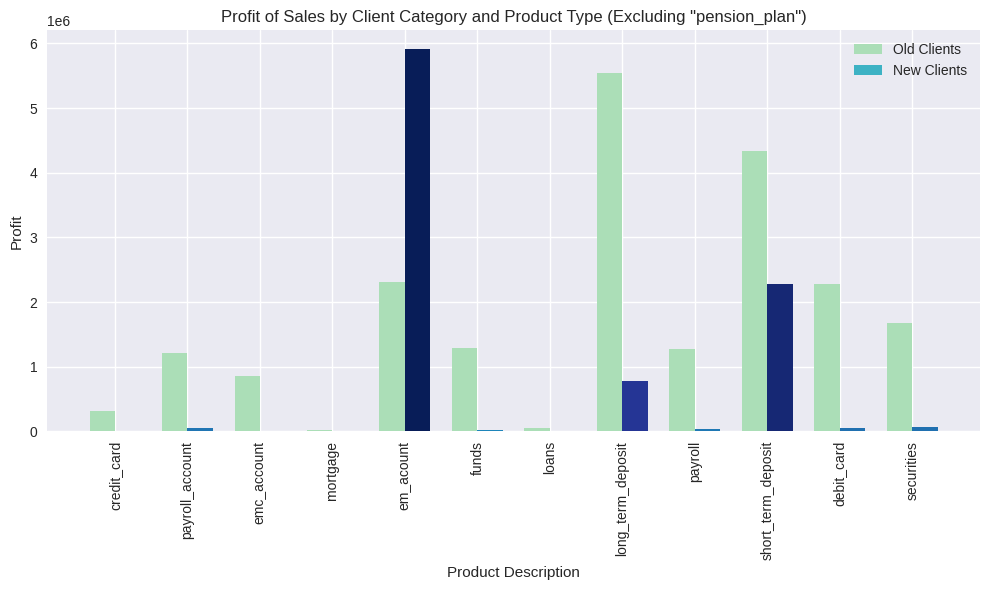

In [ ]:
modified_unique_products = unique_products - {"pension_plan"}

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(modified_unique_products))
profit_values = np.log1p(new_clients_profit.reindex(modified_unique_products, fill_value=0))
color_map = plt.cm.get_cmap('YlGnBu')
plt.bar(index, old_clients_profit.reindex(modified_unique_products, fill_value=0), width=bar_width, color=color_map(0.3), label='Old Clients')
plt.bar(index + bar_width, new_clients_profit.reindex(modified_unique_products, fill_value=0), width=bar_width, color=color_map(profit_values / np.max(profit_values)), label='New Clients')

plt.xlabel('Product Description');
plt.ylabel('Profit');
plt.title('Profit of Sales by Client Category and Product Type (Excluding "pension_plan")')
plt.xticks(index + bar_width/2, modified_unique_products, rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

###Duracion de Tenencia

In [ ]:
plt.figure(figsize=(10, 6))

tenencia_por_producto_sorted = tenencia_por_producto.sort_values('cantidad_clientes', ascending=False)
colors = sns.color_palette('tab20', n_colors=len(tenencia_por_producto_sorted))

sns.barplot(data=tenencia_por_producto_sorted, y='producto', x='cantidad_clientes', hue='duracion_tenencia', palette=colors)
plt.title('Duración de Tenencia por Producto')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Producto')
plt.legend(title='Duración de Tenencia', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tenencia_por_producto, y='producto', x='cantidad_clientes', hue='duracion_tenencia', dodge=False)

plt.title('Duración de Tenencia por Producto')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Producto')
plt.legend(title='Duración de Tenencia')
plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1000x600 with 0 Axes>

###Productos contratados por mes y año

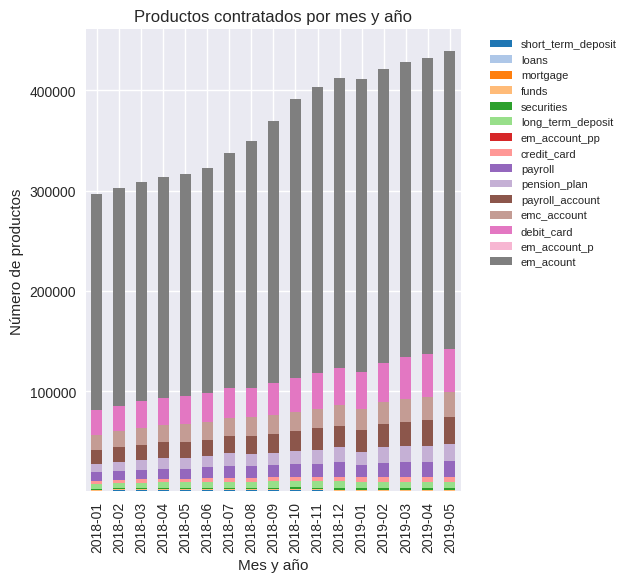

In [ ]:
product_counts = products.groupby('pk_partition')[products.columns[2:-1]].sum()
colors = sns.color_palette('tab20', n_colors=15)
product_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=colors)

plt.title('Productos contratados por mes y año')
plt.xlabel('Mes y año')
plt.ylabel('Número de productos')

legend = plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 8})
plt.subplots_adjust(right=0.75)
plt.show()



###Distribucion de clientes portipo de producto contratado

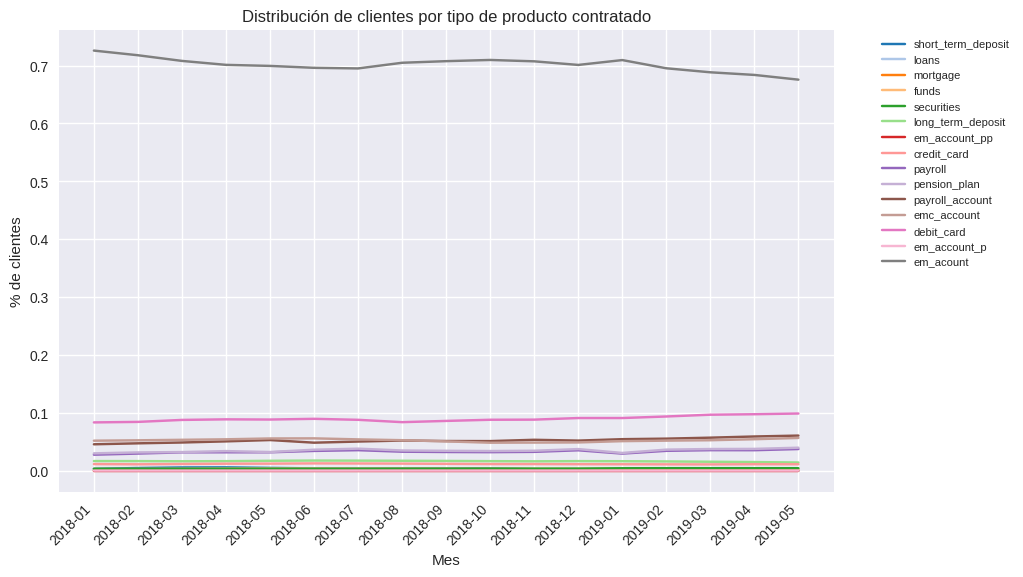

In [ ]:
product_names = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit',
                 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account',
                 'debit_card', 'em_account_p', 'em_acount']
products['total_products'] = products[product_names].sum(axis=1)
product_segmentation = products.groupby('pk_partition')[['total_products'] + [product for product in product_names]].sum().reset_index()

total_customers = product_segmentation[['pk_partition', 'total_products']].rename(columns={'total_products': 'total_customers'})
product_counts = product_segmentation.groupby('pk_partition').sum().reset_index().merge(total_customers, on='pk_partition')
for product in product_names:
    product_counts[product+'_pct'] = product_counts[product] / product_counts['total_customers']

colors = sns.color_palette('tab20', n_colors=len(product_names))


plt.figure(figsize=(10, 6))
for i, product in enumerate(product_names):
    plt.plot(product_counts['pk_partition'], product_counts[product+'_pct'], label=product, color=colors[i])

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 8})
plt.title('Distribución de clientes por tipo de producto contratado')
plt.xlabel('Mes')
plt.ylabel('% de clientes')

plt.xticks(rotation=45, ha='right')

plt.show()


###Distribucion de edad de los clientes

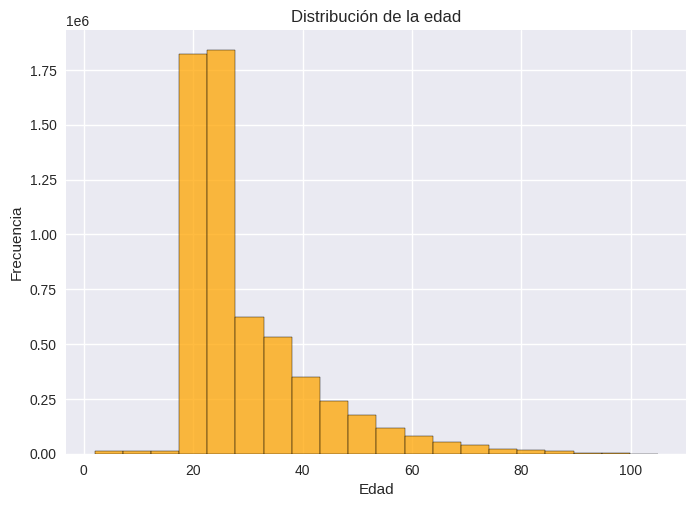

In [ ]:
sns.histplot(data=sociodemographics, x='age', bins=20, color='orange')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

###Distribucion de genero de clientes

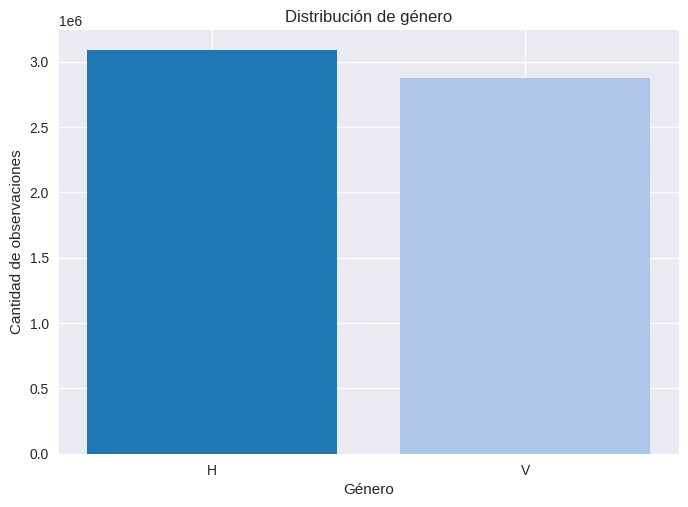

In [ ]:
gender_counts = sociodemographics['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Cantidad de observaciones')
plt.show()

###Distribucion de ingresos por pais

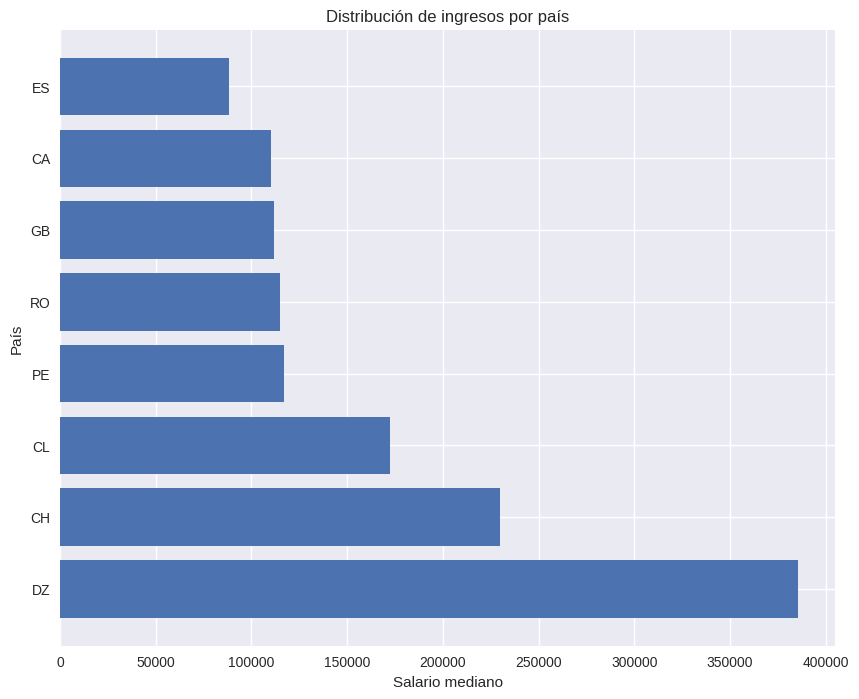

In [ ]:
median_salary_by_country = sociodemographics.groupby('country_id')['salary'].median().sort_values(ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(median_salary_by_country.index, median_salary_by_country.values)

ax.set_xlabel('Salario mediano')
ax.set_ylabel('País')
ax.set_title('Distribución de ingresos por país')

plt.show()

###Distribucion de Clientes por Segmento

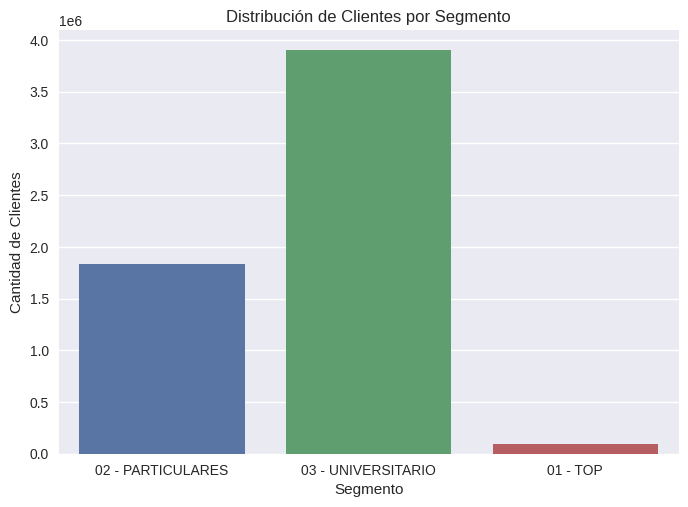

In [ ]:
sns.countplot(x='segment', data=commercial)
plt.title('Distribución de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.show()

###Clientes activos por Segmento

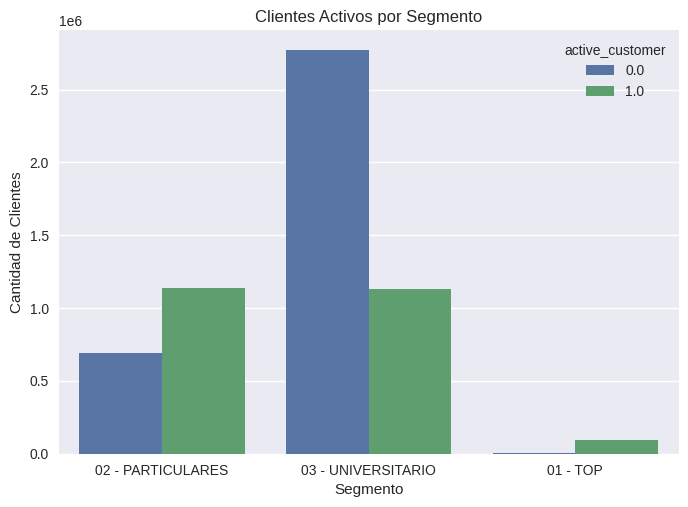

In [ ]:
sns.countplot(x='segment', data=commercial, hue='active_customer')
plt.title('Clientes Activos por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Clientes')
plt.show()

*Ahora que tenemos una idea más clara sobre nuestros datos, vamos a utilizar este conocimiento en la siguiente etapa de visualización en Power BI.*

##Descarga de los archivos necesarios

*Hemos procedido a descargar los archivos generados para facilitar la visualización en Power BI.*

In [ ]:
merged_sales.to_csv('merged_sales.csv', index=False)
merged_products.to_csv('merged_products.csv', index=False)
active_customers_por_partition.to_csv('active_customers_por_partition', index=False)
tenencia_por_producto.to_csv('tenencia_por_producto.csv', index=False)